In [1]:
from azure.quantum.plugins.qiskit import AzureQuantumProvider

# Azure Quantum Provider
provider = AzureQuantumProvider(
  resource_id="",
  location=""
)


In [2]:
# Show all current supported backends in this workspace:
print([backend.name() for backend in provider.backends()])


['ionq.simulator', 'ionq.qpu']


In [3]:
from qiskit import QuantumCircuit

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)
circuit.name = "ionq-3ghz-job"
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0,1], [0, 1])

# Print out the circuit
print("================== Running circuit: ==================")
print(circuit.draw())
print("======================================================")


================== Running circuit: ==================
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


In [4]:
# Get IonQ's simulator backend:
simulator_backend = provider.get_backend("ionq.simulator")

# Submit the circuit to run on Azure Quantum
job = simulator_backend.run(circuit, shots=250)
id = job.id()
print("Job id", id)

Job id d7958738-f67d-11eb-8618-f01dbc9fb65d


In [5]:
from qiskit.tools.monitor import job_monitor

# Monitor job progress and wait until complete:
job_monitor(job)


Job Status: job has successfully run


This is just a simple function to plot the result's histogram using `matplotlib`.

{'0': 125, '3': 125}


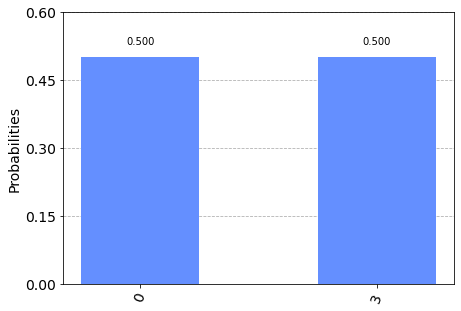

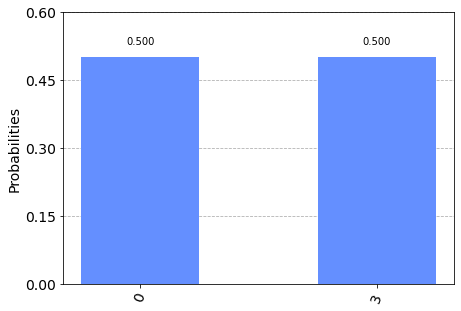

In [6]:
from qiskit.visualization import plot_histogram

# Get the job results and print as histogram:
result = job.result()
counts = result.get_counts(circuit)
print(counts)
plot_histogram(counts)


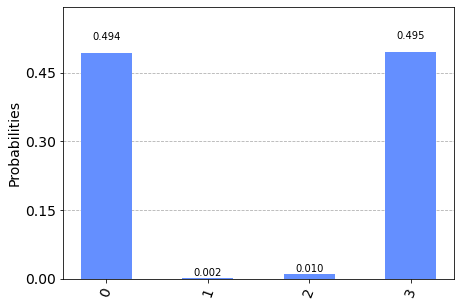

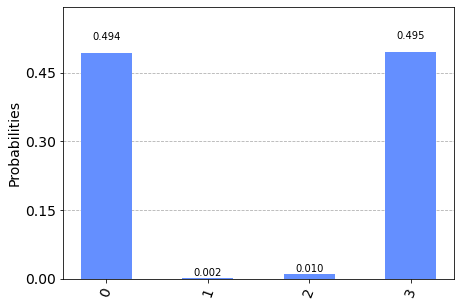

In [7]:
# fetch an existing job that run on the qpu and display the results
job = provider.get_job('3bfad3a8-f67b-11eb-a6ee-f01dbc9fb65d') # qiskit qpu
plot_histogram(job.result().get_counts())

In [8]:
import azure.quantum
print (azure.quantum.__version__)

0.0.0.1
